Crypto Trading Decision Model

Combine Input Files into a Single Data Frame

In [1]:
import pandas as pd
import os

# Specify the directory containing the files
directory = r'C:\Users\KonstantinGrigorov\OneDrive - ROITI Ltd\Документи\Lichni\Summer Academy 2024 Cases\Crypto\data'

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        prefix = filename.split('_USDT_1m')[0]  # Extract the prefix from the filename
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        df['Crypto'] = prefix  # Add the prefix as a new column named 'Crypto'
        dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Reorder the columns to have 'timestamp' and 'Crypto' as the first two columns
columns = ['timestamp', 'Crypto'] + [col for col in combined_df.columns if col not in ['timestamp', 'Crypto']]
combined_df = combined_df[columns]

In [2]:
# Display the combined DataFrame
combined_df

,timestamp,Crypto,open,high,low,close,volume
0,2023-06-09 12:18:00,ADA,0.3183,0.3184,0.3183,0.3184,11943.2
1,2023-06-09 12:19:00,ADA,0.3184,0.3186,0.3183,0.3186,48180.0
2,2023-06-09 12:20:00,ADA,0.3186,0.3187,0.3185,0.3185,99419.5
3,2023-06-09 12:21:00,ADA,0.3186,0.3200,0.3184,0.3196,1308074.7
4,2023-06-09 12:22:00,ADA,0.3195,0.3205,0.3192,0.3204,1807562.8
...,...,...,...,...,...,...,...
28740841,2024-06-08 17:55:00,ZRX,0.4535,0.4539,0.4534,0.4539,2035.0
28740842,2024-06-08 17:56:00,ZRX,0.4541,0.4541,0.4540,0.4540,1931.0
28740843,2024-06-08 17:57:00,ZRX,0.4540,0.4540,0.4540,0.4540,0.0
28740844,2024-06-08 17:58:00,ZRX,0.4540,0.4540,0.4540,0.4540,330.0


Extract closing prices into a new data frame

In [3]:
# Pivot the DataFrame to have separate columns for each cryptocurrency's close prices
close_prices_df = combined_df.pivot(index='timestamp', columns='Crypto', values='close')

# Reset the index to make 'timestamp' a column again
close_prices_df.reset_index(inplace=True)

In [4]:
close_prices_df

Crypto,timestamp,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
0,2023-06-09 12:18:00,0.3184,0.1254,0.02374,9.368,0.1966,261.3,26640.01,0.01655,0.08800,...,0.01735,0.1918,1.592,0.000071,0.0874,143.0,0.5324,29.1,0.02127,0.2008
1,2023-06-09 12:19:00,0.3186,0.1254,0.02376,9.377,0.1966,261.6,26654.99,0.01656,0.08800,...,0.01735,0.1918,1.594,0.000071,0.0875,142.9,0.5321,29.1,0.02128,0.2011
2,2023-06-09 12:20:00,0.3185,0.1255,0.02379,9.377,0.1966,261.7,26661.16,0.01658,0.08810,...,0.01736,0.1916,1.593,0.000071,0.0874,142.9,0.5327,29.1,0.02129,0.2012
3,2023-06-09 12:21:00,0.3196,0.1254,0.02375,9.373,0.1966,261.6,26643.89,0.01658,0.08810,...,0.01734,0.1916,1.591,0.000071,0.0874,142.9,0.5329,29.1,0.02126,0.2009
4,2023-06-09 12:22:00,0.3204,0.1253,0.02373,9.371,0.1966,261.5,26632.23,0.01656,0.08800,...,0.01735,0.1916,1.591,0.000071,0.0874,142.8,0.5322,29.1,0.02127,0.2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526357,2024-06-09 00:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526358,2024-06-09 00:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526359,2024-06-09 00:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526360,2024-06-09 00:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove periods with missing values for the Bitcoin from the data frame

In [5]:
# Remove rows where the Bitcoin (BTC) close price is missing
cleaned_close_prices_df = close_prices_df.dropna(subset=['BTC'])

In [6]:
cleaned_close_prices_df

Crypto,timestamp,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
0,2023-06-09 12:18:00,0.3184,0.1254,0.02374,9.368,0.1966,261.3,26640.01,0.01655,0.08800,...,0.01735,0.1918,1.592,0.000071,0.0874,143.0,0.5324,29.10,0.02127,0.2008
1,2023-06-09 12:19:00,0.3186,0.1254,0.02376,9.377,0.1966,261.6,26654.99,0.01656,0.08800,...,0.01735,0.1918,1.594,0.000071,0.0875,142.9,0.5321,29.10,0.02128,0.2011
2,2023-06-09 12:20:00,0.3185,0.1255,0.02379,9.377,0.1966,261.7,26661.16,0.01658,0.08810,...,0.01736,0.1916,1.593,0.000071,0.0874,142.9,0.5327,29.10,0.02129,0.2012
3,2023-06-09 12:21:00,0.3196,0.1254,0.02375,9.373,0.1966,261.6,26643.89,0.01658,0.08810,...,0.01734,0.1916,1.591,0.000071,0.0874,142.9,0.5329,29.10,0.02126,0.2009
4,2023-06-09 12:22:00,0.3204,0.1253,0.02373,9.371,0.1966,261.5,26632.23,0.01656,0.08800,...,0.01735,0.1916,1.591,0.000071,0.0874,142.8,0.5322,29.10,0.02127,0.2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525609,2024-06-08 12:27:00,0.4345,0.1691,0.03917,7.891,0.2231,684.0,69363.37,0.02151,0.11932,...,0.03210,0.2345,1.336,0.000111,0.0975,NaN,0.4937,24.26,0.02175,0.4623
525610,2024-06-08 12:28:00,0.4346,0.1690,0.03912,7.893,0.2229,682.7,69350.26,0.02149,0.11922,...,0.03208,0.2341,1.335,0.000111,0.0975,NaN,0.4937,24.23,0.02173,0.4618
525611,2024-06-08 12:29:00,0.4348,0.1691,0.03914,7.897,0.2229,682.8,69346.20,0.02150,0.11930,...,0.03209,0.2342,1.336,0.000111,0.0976,NaN,0.4940,24.22,0.02174,0.4620
525612,2024-06-08 12:30:00,0.4349,0.1690,0.03911,7.895,0.2229,682.3,69362.50,0.02148,0.11928,...,0.03207,0.2341,1.337,0.000111,0.0976,NaN,0.4942,24.22,0.02174,0.4618


Fill missing values with the previous ones

In [7]:
# Fill NaN values with the previous value (forward fill)
cleaned_close_prices_df.ffill(inplace=True)

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\4280756992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_close_prices_df.ffill(inplace=True)


In [8]:
cleaned_close_prices_df

Crypto,timestamp,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
0,2023-06-09 12:18:00,0.3184,0.1254,0.02374,9.368,0.1966,261.3,26640.01,0.01655,0.08800,...,0.01735,0.1918,1.592,0.000071,0.0874,143.0,0.5324,29.10,0.02127,0.2008
1,2023-06-09 12:19:00,0.3186,0.1254,0.02376,9.377,0.1966,261.6,26654.99,0.01656,0.08800,...,0.01735,0.1918,1.594,0.000071,0.0875,142.9,0.5321,29.10,0.02128,0.2011
2,2023-06-09 12:20:00,0.3185,0.1255,0.02379,9.377,0.1966,261.7,26661.16,0.01658,0.08810,...,0.01736,0.1916,1.593,0.000071,0.0874,142.9,0.5327,29.10,0.02129,0.2012
3,2023-06-09 12:21:00,0.3196,0.1254,0.02375,9.373,0.1966,261.6,26643.89,0.01658,0.08810,...,0.01734,0.1916,1.591,0.000071,0.0874,142.9,0.5329,29.10,0.02126,0.2009
4,2023-06-09 12:22:00,0.3204,0.1253,0.02373,9.371,0.1966,261.5,26632.23,0.01656,0.08800,...,0.01735,0.1916,1.591,0.000071,0.0874,142.8,0.5322,29.10,0.02127,0.2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525609,2024-06-08 12:27:00,0.4345,0.1691,0.03917,7.891,0.2231,684.0,69363.37,0.02151,0.11932,...,0.03210,0.2345,1.336,0.000111,0.0975,118.7,0.4937,24.26,0.02175,0.4623
525610,2024-06-08 12:28:00,0.4346,0.1690,0.03912,7.893,0.2229,682.7,69350.26,0.02149,0.11922,...,0.03208,0.2341,1.335,0.000111,0.0975,118.7,0.4937,24.23,0.02173,0.4618
525611,2024-06-08 12:29:00,0.4348,0.1691,0.03914,7.897,0.2229,682.8,69346.20,0.02150,0.11930,...,0.03209,0.2342,1.336,0.000111,0.0976,118.7,0.4940,24.22,0.02174,0.4620
525612,2024-06-08 12:30:00,0.4349,0.1690,0.03911,7.895,0.2229,682.3,69362.50,0.02148,0.11928,...,0.03207,0.2341,1.337,0.000111,0.0976,118.7,0.4942,24.22,0.02174,0.4618


Calculate daily returns based on the cleaned data frame

In [9]:
# Calculate returns
returns_df = cleaned_close_prices_df.copy()
cryptos = returns_df.columns[1:]  # Exclude 'timestamp' column

for crypto in cryptos:
    returns_df[crypto] = (returns_df[crypto] - returns_df[crypto].shift(1)) / returns_df[crypto].shift(1)

# Drop the first row which will have NaN values due to the shift
returns_df.dropna(inplace=True)

In [10]:
returns_df

Crypto,timestamp,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
1,2023-06-09 12:19:00,0.000628,0.000000,0.000842,0.000961,0.000000,0.001148,0.000562,0.000604,0.000000,...,0.000000,0.000000,0.001256,-0.001408,0.001144,-0.000699,-0.000563,0.000000,0.000470,0.001494
2,2023-06-09 12:20:00,-0.000314,0.000797,0.001263,0.000000,0.000000,0.000382,0.000231,0.001208,0.001136,...,0.000576,-0.001043,-0.000627,0.001410,-0.001143,0.000000,0.001128,0.000000,0.000470,0.000497
3,2023-06-09 12:21:00,0.003454,-0.000797,-0.001681,-0.000427,0.000000,-0.000382,-0.000648,0.000000,0.000000,...,-0.001152,0.000000,-0.001255,0.000000,0.000000,0.000000,0.000375,0.000000,-0.001409,-0.001491
4,2023-06-09 12:22:00,0.002503,-0.000797,-0.000842,-0.000213,0.000000,-0.000382,-0.000438,-0.001206,-0.001135,...,0.000577,0.000000,0.000000,0.000000,0.000000,-0.000700,-0.001314,0.000000,0.000470,-0.000498
5,2023-06-09 12:23:00,0.002185,0.000798,0.000000,0.000320,0.000000,-0.000382,-0.000070,0.000604,0.000000,...,0.000000,0.000000,0.000629,0.000000,0.000000,0.000700,-0.000376,0.000000,0.000000,0.000498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525609,2024-06-08 12:27:00,0.000230,0.001184,-0.000255,-0.000380,0.000897,0.000439,0.000351,-0.000465,0.001931,...,0.000000,-0.000426,-0.004471,0.000904,-0.001025,0.000000,-0.000405,-0.000412,0.000460,0.000000
525610,2024-06-08 12:28:00,0.000230,-0.000591,-0.001276,0.000253,-0.000896,-0.001901,-0.000189,-0.000930,-0.000838,...,-0.000623,-0.001706,-0.000749,-0.000903,0.000000,0.000000,0.000000,-0.001237,-0.000920,-0.001082
525611,2024-06-08 12:29:00,0.000460,0.000592,0.000511,0.000507,0.000000,0.000146,-0.000059,0.000465,0.000671,...,0.000312,0.000427,0.000749,0.000000,0.001026,0.000000,0.000608,-0.000413,0.000460,0.000433
525612,2024-06-08 12:30:00,0.000230,-0.000591,-0.000766,-0.000253,0.000000,-0.000732,0.000235,-0.000930,-0.000168,...,-0.000623,-0.000427,0.000749,0.000904,0.000000,0.000000,0.000405,0.000000,0.000000,-0.000433


Check for NaN values in the returns_df

In [11]:
returns_df.isna().sum().sum()

0

Calculate correlations for the returns of the different cryptocurrencies

In [14]:
returns_df.set_index('timestamp').corr()

Crypto,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,COS,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
Crypto,,,,,,,,,,,,,,,,,,,,,
ADA,1.000000,0.623865,0.551764,0.656723,0.576379,0.561502,0.641328,0.556192,0.548042,0.110434,...,0.591233,0.143622,0.515928,0.133602,0.500364,0.235370,0.594525,0.527909,0.613604,0.441756
ALGO,0.623865,1.000000,0.539513,0.603142,0.560968,0.495039,0.557582,0.548816,0.530127,0.106730,...,0.542531,0.136506,0.498009,0.125106,0.453433,0.222745,0.515348,0.509121,0.586160,0.433780
ANKR,0.551764,0.539513,1.000000,0.533734,0.523995,0.449933,0.498384,0.516988,0.474345,0.104110,...,0.497011,0.135083,0.456033,0.123334,0.408672,0.197580,0.465674,0.470730,0.553484,0.410982
ATOM,0.656723,0.603142,0.533734,1.000000,0.567098,0.541296,0.609077,0.548545,0.543849,0.107050,...,0.576420,0.139398,0.511125,0.129916,0.470275,0.237418,0.537113,0.522203,0.606045,0.435582
BAT,0.576379,0.560968,0.523995,0.567098,1.000000,0.473692,0.534626,0.542219,0.503362,0.111277,...,0.528771,0.144112,0.480101,0.132933,0.431184,0.210420,0.490946,0.509940,0.576359,0.430048
BNB,0.561502,0.495039,0.449933,0.541296,0.473692,1.000000,0.581812,0.455588,0.453172,0.102165,...,0.490190,0.123826,0.425376,0.125286,0.394161,0.191268,0.461197,0.434286,0.507539,0.357045
BTC,0.641328,0.557582,0.498384,0.609077,0.534626,0.581812,1.000000,0.499684,0.505343,0.120238,...,0.570371,0.153700,0.479999,0.142192,0.445282,0.228057,0.551460,0.490357,0.572740,0.397942
CELR,0.556192,0.548816,0.516988,0.548545,0.542219,0.455588,0.499684,1.000000,0.494341,0.108504,...,0.507559,0.137709,0.466843,0.127302,0.417106,0.213973,0.469119,0.500548,0.554312,0.416550
CHZ,0.548042,0.530127,0.474345,0.543849,0.503362,0.453172,0.505343,0.494341,1.000000,0.099159,...,0.491239,0.125026,0.455713,0.113210,0.396541,0.192588,0.452912,0.463809,0.536239,0.391424


Calculate Mean and Cov of returns for the Portfolio Optimization

In [18]:
# Calculate mean returns and covariance matrix
mean_returns = returns_df[cryptos].mean()
cov_matrix = returns_df[cryptos].cov()

In [19]:
mean_returns

Crypto
ADA      1.235763e-06
ALGO     1.464049e-06
ANKR     1.982237e-06
ATOM     2.171359e-07
BAT      9.299088e-07
BNB      2.171267e-06
BTC      2.036766e-06
CELR     1.540469e-06
CHZ      1.503294e-06
COS      3.111349e-06
CVC      2.356946e-06
DASH    -2.595403e-08
DENT     1.998508e-06
DOCK     2.564131e-06
DOGE     2.343082e-06
DUSK     3.586705e-06
ENJ      6.136051e-07
EOS      4.560741e-07
ETC      1.575261e-06
ETH      1.588243e-06
FET      5.532428e-06
FTM      2.865808e-06
FUN      1.955656e-06
HOT      1.950531e-06
ICX      6.304229e-07
IOST     6.884674e-07
IOTA     1.278523e-06
KEY      1.600127e-06
LINK     2.563369e-06
LTC      3.057337e-07
MATIC    2.612780e-07
MTL      1.539935e-06
NEO      1.743582e-06
NULS     3.500342e-06
OMG      6.616935e-07
ONE      1.818969e-06
ONG      2.648491e-06
ONT      1.644613e-06
PERL    -4.733196e-07
QTUM     1.452432e-06
TFUEL    2.987335e-06
THETA    2.928287e-06
TOMO     6.122465e-07
TRX      8.000141e-07
TUSD     5.263147e-09
USD

In [20]:
cov_matrix

Crypto,ADA,ALGO,ANKR,ATOM,BAT,BNB,BTC,CELR,CHZ,COS,...,VET,WAN,WAVES,WIN,XLM,XMR,XRP,ZEC,ZIL,ZRX
Crypto,,,,,,,,,,,,,,,,,,,,,
ADA,1.277343e-06,9.415772e-07,8.941761e-07,7.715654e-07,7.653052e-07,5.251641e-07,4.765449e-07,9.066181e-07,8.400861e-07,2.388039e-07,...,8.050054e-07,2.865130e-07,8.928043e-07,2.073405e-07,6.594295e-07,2.147491e-07,7.203056e-07,7.586310e-07,8.576034e-07,8.232533e-07
ALGO,9.415772e-07,1.783295e-06,1.033069e-06,8.372750e-07,8.800797e-07,5.470676e-07,4.895419e-07,1.057023e-06,9.601689e-07,2.726976e-07,...,8.728147e-07,3.217611e-07,1.018269e-06,2.294067e-07,7.060783e-07,2.401298e-07,7.377437e-07,8.644709e-07,9.679928e-07,9.551658e-07
ANKR,8.941761e-07,1.033069e-06,2.056042e-06,7.955690e-07,8.827052e-07,5.338924e-07,4.698398e-07,1.069159e-06,9.225004e-07,2.856224e-07,...,8.585549e-07,3.418906e-07,1.001210e-06,2.428377e-07,6.833114e-07,2.287100e-07,7.157994e-07,8.582334e-07,9.814435e-07,9.717101e-07
ATOM,7.715654e-07,8.372750e-07,7.955690e-07,1.080621e-06,6.925759e-07,4.656520e-07,4.162738e-07,8.224226e-07,7.667803e-07,2.129152e-07,...,7.218742e-07,2.557769e-07,8.135372e-07,1.854453e-07,5.700545e-07,1.992400e-07,5.985435e-07,6.902297e-07,7.790873e-07,7.466287e-07
BAT,7.653052e-07,8.800797e-07,8.827052e-07,6.925759e-07,1.380209e-06,4.605298e-07,4.129448e-07,9.187421e-07,8.020633e-07,2.501269e-07,...,7.483868e-07,2.988417e-07,8.636116e-07,2.144478e-07,5.906947e-07,1.995653e-07,6.182998e-07,7.617445e-07,8.373552e-07,8.330811e-07
BNB,5.251641e-07,5.470676e-07,5.338924e-07,4.656520e-07,4.605298e-07,6.848247e-07,3.165497e-07,5.437614e-07,5.086377e-07,1.617617e-07,...,4.886973e-07,1.808719e-07,5.389839e-07,1.423665e-07,3.803568e-07,1.277787e-07,4.091378e-07,4.569657e-07,5.194015e-07,4.872033e-07
BTC,4.765449e-07,4.895419e-07,4.698398e-07,4.162738e-07,4.129448e-07,3.165497e-07,4.322546e-07,4.738174e-07,4.506219e-07,1.512495e-07,...,4.517659e-07,1.783664e-07,4.831964e-07,1.283696e-07,3.413764e-07,1.210429e-07,3.886662e-07,4.099204e-07,4.656633e-07,4.314077e-07
CELR,9.066181e-07,1.057023e-06,1.069159e-06,8.224226e-07,9.187421e-07,5.437614e-07,4.738174e-07,2.080138e-06,9.670057e-07,2.994160e-07,...,8.818991e-07,3.505714e-07,1.030933e-06,2.521148e-07,7.014894e-07,2.491330e-07,7.253073e-07,9.179293e-07,9.886548e-07,9.906296e-07
CHZ,8.400861e-07,9.601689e-07,9.225004e-07,7.667803e-07,8.020633e-07,5.086377e-07,4.506219e-07,9.670057e-07,1.839552e-06,2.573177e-07,...,8.026658e-07,2.993128e-07,9.463700e-07,2.108426e-07,6.271508e-07,2.108686e-07,6.585103e-07,7.998579e-07,8.994127e-07,8.753898e-07


Data Preparation and Model Building

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import plotly.graph_objects as go

# Define the time window for training and prediction
train_window = 15  # 15 minutes for training
predict_window = 15  # 15 minutes for prediction

Column names in returns_df: Index(['timestamp', 'ADA', 'ALGO', 'ANKR', 'ATOM', 'BAT', 'BNB', 'BTC', 'CELR',
       'CHZ', 'COS', 'CVC', 'DASH', 'DENT', 'DOCK', 'DOGE', 'DUSK', 'ENJ',
       'EOS', 'ETC', 'ETH', 'FET', 'FTM', 'FUN', 'HOT', 'ICX', 'IOST', 'IOTA',
       'KEY', 'LINK', 'LTC', 'MATIC', 'MTL', 'NEO', 'NULS', 'OMG', 'ONE',
       'ONG', 'ONT', 'PERL', 'QTUM', 'TFUEL', 'THETA', 'TOMO', 'TRX', 'TUSD',
       'USDC', 'VET', 'WAN', 'WAVES', 'WIN', 'XLM', 'XMR', 'XRP', 'ZEC', 'ZIL',
       'ZRX'],
      dtype='object', name='Crypto')
Column names in cleaned_close_prices_df: Index(['timestamp', 'ADA', 'ALGO', 'ANKR', 'ATOM', 'BAT', 'BNB', 'BTC', 'CELR',
       'CHZ', 'COS', 'CVC', 'DASH', 'DENT', 'DOCK', 'DOGE', 'DUSK', 'ENJ',
       'EOS', 'ETC', 'ETH', 'FET', 'FTM', 'FUN', 'HOT', 'ICX', 'IOST', 'IOTA',
       'KEY', 'LINK', 'LTC', 'MATIC', 'MTL', 'NEO', 'NULS', 'OMG', 'ONE',
       'ONG', 'ONT', 'PERL', 'QTUM', 'TFUEL', 'THETA', 'TOMO', 'TRX', 'TUSD',
       'USDC', 'VET', 'WAN'

Portfolio Optimization

In [33]:
# Mean-Variance Optimization without Risk-Free Rate
def get_optimal_weights(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    bound = (0.0, 1.0)
    bounds = tuple(bound for _ in range(num_assets))
    
    def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
        p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
        return -p_ret / p_var
    
    def portfolio_performance(weights, mean_returns, cov_matrix):
        returns = np.sum(mean_returns * weights)
        std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return std_dev, returns
    
    result = minimize(neg_sharpe_ratio, num_assets * [1. / num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

Rolling Window Implementation with Average Close Prices and 96 Iterations (1 day) Limit

Iteration 0, Period 0: Buy Volumes - {'COS': 80711.55678443323, 'DASH': 44.96630060796027, 'MTL': 2444.172541012492, 'ONG': 2912.2441686531683, 'PERL': 41480.21470367097}
Iteration 0, Period 0: Sell Volumes - {'ALGO': 0.0, 'ANKR': 0.0, 'ATOM': 0.0, 'BAT': 0.0, 'BNB': 0.0, 'BTC': 0.0, 'CELR': 0.0, 'CHZ': 0.0, 'CVC': 0.0, 'DENT': 0.0, 'DOCK': 0.0, 'DOGE': 0.0, 'DUSK': 0.0, 'ENJ': 0.0, 'EOS': 0.0, 'ETC': 0.0, 'ETH': 0.0, 'FET': 0.0, 'FTM': 0.0, 'FUN': 0.0, 'HOT': 0.0, 'ICX': 0.0, 'IOST': 0.0, 'IOTA': 0.0, 'KEY': 0.0, 'LINK': 0.0, 'LTC': 0.0, 'MATIC': 0.0, 'NEO': 0.0, 'NULS': 0.0, 'OMG': 0.0, 'ONE': 0.0, 'ONT': 0.0, 'QTUM': 0.0, 'TFUEL': 0.0, 'THETA': 0.0, 'TOMO': 0.0, 'TRX': 0.0, 'TUSD': 0.0, 'USDC': 0.0, 'VET': 0.0, 'WAN': 0.0, 'WAVES': 0.0, 'WIN': 0.0, 'XLM': 0.0, 'XMR': 0.0, 'XRP': 0.0, 'ZEC': 0.0, 'ZIL': 0.0, 'ZRX': 0.0}


C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:76: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:79: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:90: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA 

Iteration 1, Period 0: Buy Volumes - {'ALGO': 14.9556294223317, 'ANKR': 63.89277728865872, 'ATOM': 0.15368519641098502, 'BAT': 7.0652620838998486, 'BTC': 5.406680670208681e-05, 'CELR': 36464.92727191269, 'CHZ': 12.109170017811516, 'CVC': 5279.803804377225, 'DENT': 1466.519349055753, 'DOCK': 66.10371562605897, 'DOGE': 10557.799006665244, 'DUSK': 5.780631147594764, 'ENJ': 1.3599946572080073, 'ETC': 0.06087955173490855, 'ETH': 6.343915873094083e-06, 'FTM': 2.839151025139607, 'FUN': 191.1969014669603, 'HOT': 608.280041099068, 'IOST': 139.3118344287279, 'IOTA': 4.9455799417578445, 'KEY': 55480.382077238435, 'LTC': 0.0001280810501157168, 'MATIC': 0.9982905743597724, 'NULS': 5.357734550970756, 'OMG': 2.464676251201081, 'ONT': 5.94306616224813, 'TFUEL': 24.86474736668491, 'TOMO': 0.37956563874732463, 'TRX': 17.799378062628538, 'TUSD': 1.2813497133904734, 'USDC': 1.2522733829009538, 'WAN': 6.5110227851736795, 'WIN': 20207.33029321507, 'XLM': 0.9138190457850155, 'XMR': 0.009171934804883724, 'ZEC

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:76: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:79: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Iteration 2, Period 0: Buy Volumes - {'ALGO': 946.5365996400361, 'BNB': 4.0040264173418834e-05, 'DASH': 0.0018958802566817338, 'DOGE': 2619.109669621609, 'EOS': 0.014954120009374674, 'FET': 0.0365829793721828, 'ICX': 0.19113738087524956, 'LINK': 152.46104708602346, 'LTC': 0.3064583203775541, 'NEO': 0.0012625682941680124, 'ONE': 0.5850771057409839, 'ONG': 364.6543651603661, 'QTUM': 0.0022242165645625527, 'THETA': 0.0009514186380929002, 'TOMO': 0.0869657389580359, 'VET': 0.32360565990887763, 'XRP': 0.012811993613475238}
Iteration 2, Period 0: Sell Volumes - {'ANKR': 0.02789537875275851, 'ATOM': 6.155066587115028e-05, 'BAT': 0.0027822660836222955, 'BTC': 2.2258664081391022e-08, 'CELR': 6351.524698887229, 'CHZ': 0.0050396391456681575, 'COS': 30.65450022148305, 'CVC': 753.418791698878, 'DENT': 0.5932364207564178, 'DOCK': 0.024450105075481048, 'DUSK': 0.0022966264563896773, 'ENJ': 0.0002745820233298585, 'ETC': 1.4056145651530208e-05, 'ETH': 8.314466146163295e-11, 'FTM': 0.0011747318289442932

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:76: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Iteration 3, Period 0: Buy Volumes - {'ANKR': 28.69467564978361, 'ATOM': 0.007083678271111265, 'BAT': 0.39692535384150884, 'BNB': 0.00015455849814356457, 'BTC': 4.117651757803986e-06, 'CELR': 3889.321437087956, 'CHZ': 0.41161651811788724, 'COS': 65.9257921213201, 'DASH': 0.0007111816244578411, 'DENT': 237.70229844473562, 'DOCK': 5.472181410141628, 'DUSK': 0.2612856806519229, 'ENJ': 0.3686075135322891, 'EOS': 0.0010294935591234474, 'ETH': 5.640014137698508e-05, 'FET': 626.2842522733291, 'HOT': 89.40153663466714, 'ICX': 0.03835070249867045, 'IOST': 2.732539521771066, 'IOTA': 0.6581331834323902, 'MATIC': 538.7757070542746, 'MTL': 0.22735216688918908, 'NEO': 0.01763598398431147, 'NULS': 0.6393787836623677, 'OMG': 0.05150771556193681, 'ONE': 6.513819415860372, 'ONT': 0.4751916210826983, 'PERL': 6329.952824629915, 'QTUM': 0.04136898710639745, 'TFUEL': 1.0219270574179766, 'THETA': 0.0010606708718719207, 'TOMO': 261.35881230432824, 'TRX': 1.9145729069025752, 'TUSD': 0.12931514704005367, 'USDC'

C:\Users\KonstantinGrigorov\AppData\Local\Temp\ipykernel_18516\1536616138.py:76: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Iteration 4, Period 0: Buy Volumes - {'CELR': 7194.453611830271, 'FTM': 0.03036569870675151, 'FUN': 14.968757830871912, 'ICX': 0.18726065439504996, 'IOTA': 566.093344842747, 'LTC': 0.00012058293247227933, 'OMG': 204.49581438958782, 'ONG': 57.00317948027048, 'WAVES': 0.0341994020771304, 'XLM': 2277.8092539367394, 'XRP': 0.212684502341378}
Iteration 4, Period 0: Sell Volumes - {'ALGO': 0.0055198114764648965, 'ANKR': 0.04182517042975296, 'ATOM': 9.597905747162501e-06, 'BAT': 0.0003845498570385741, 'BNB': 5.1060731652078385e-09, 'BTC': 4.604502939464304e-09, 'CHZ': 0.0003142887611275453, 'COS': 19.091189876276793, 'CVC': 0.11589415198338335, 'DASH': 0.0016110279694567387, 'DENT': 0.2595950164227086, 'DOCK': 0.007800725882918339, 'DOGE': 2.3250619665710923, 'DUSK': 1.6199259466775175e-05, 'ENJ': 0.00010488125828849406, 'EOS': 9.361689133903665e-08, 'ETC': 5.230507184455076e-06, 'ETH': 4.072247308460166e-09, 'FET': 58.167738544576906, 'HOT': 0.0637246586730778, 'IOST': 0.00322521180769376, '

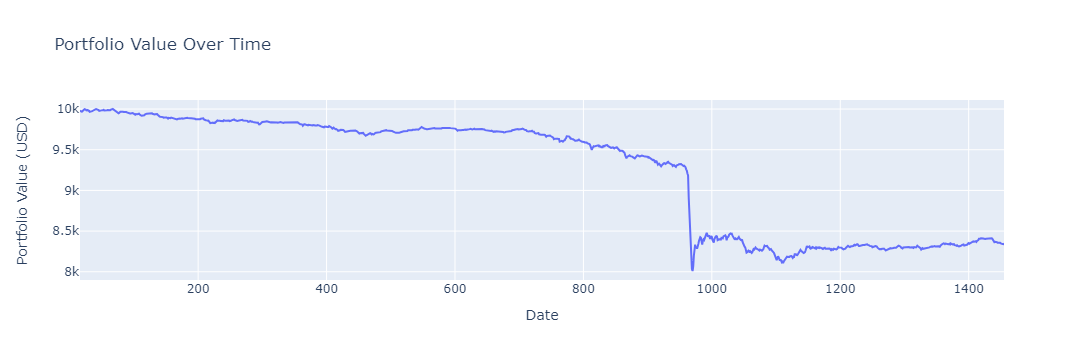

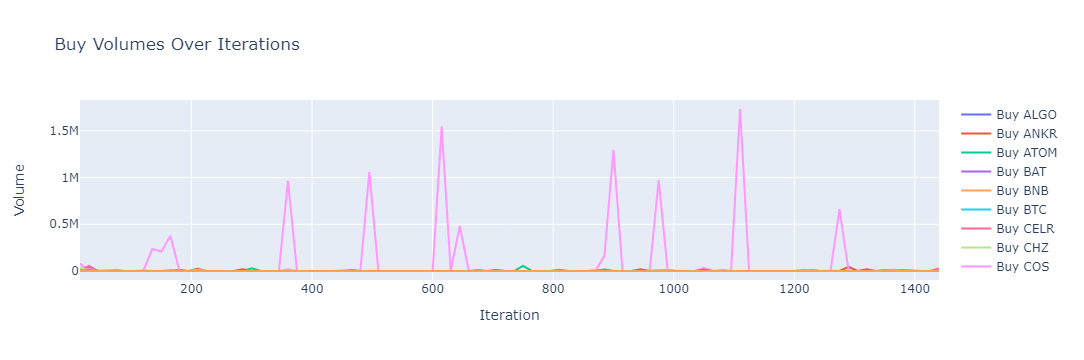

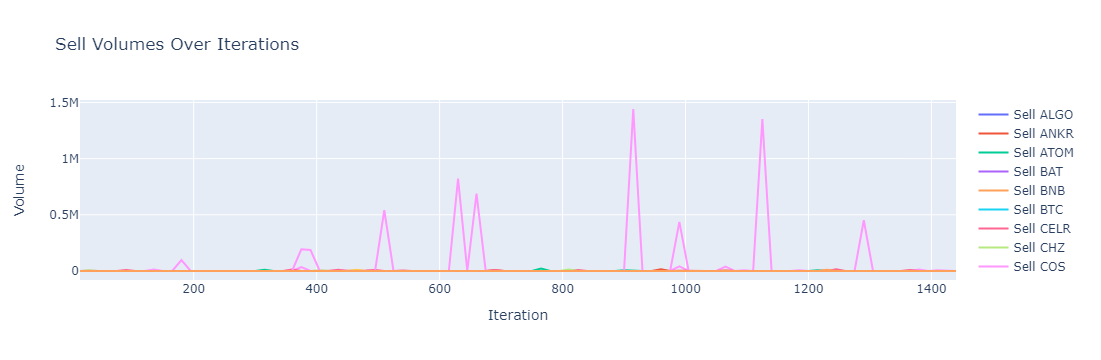

Standard Deviation of Portfolio Value: 689.8670573577747
Initial Investment: 10000
Final Portfolio Value: 8351.815039864085


In [34]:
# Rolling window implementation with linear regression predictions and MVO
initial_investment = 10000
cash = initial_investment
crypto_holdings = {crypto: 0 for crypto in crypto_columns}
portfolio_value = [initial_investment]
transaction_fee = 0.0025

results = pd.DataFrame(columns=['Date', 'Portfolio_Value'])
previous_optimal_weights = np.array([1/len(crypto_holdings)] * len(crypto_holdings))

# DataFrames to store buy and sell volumes
buy_volumes_df = pd.DataFrame(columns=crypto_columns)
sell_volumes_df = pd.DataFrame(columns=crypto_columns)

# Rolling window approach with a limit of 20 iterations
iteration_count = 0
for start in range(0, len(returns_df) - train_window - predict_window, predict_window):
    if iteration_count >= 96:
        break

    # Training data
    train_data = scaled_data[start:start + train_window]
    X_train, y_train = create_sequences(train_data, seq_length)

    # Train the linear regression model
    model.fit(X_train, y_train)

    # Mean returns and covariance matrix for the predicted period
    mean_returns = np.mean(predicted_prices, axis=0)
    cov_matrix = np.cov(predicted_prices, rowvar=False)

    # Calculate optimal weights
    optimal_weights = get_optimal_weights(mean_returns, cov_matrix)

    # Calculate average close prices over the prediction window using cleaned_close_prices_df
    avg_close_prices = cleaned_close_prices_df.iloc[start + train_window:start + train_window + predict_window][crypto_columns].mean()

    for i in range(predict_window):
        current_index = start + train_window + i
        if current_index >= len(returns_df):
            break
        buy_volumes = {}
        sell_volumes = {}
        for j, crypto in enumerate(crypto_columns):
            weight_change = optimal_weights[j] - previous_optimal_weights[j]
            if weight_change > 0:
                # Buy transaction
                amount_to_invest = cash * weight_change
                if np.isnan(amount_to_invest):
                    print(f"NaN value encountered in amount_to_invest for {crypto} at iteration {iteration_count}. Skipping this transaction.")
                    continue
                cash -= amount_to_invest * (1 + transaction_fee)
                buy_volume = amount_to_invest / avg_close_prices[crypto]
                crypto_holdings[crypto] += buy_volume
                buy_volumes[crypto] = buy_volume
            elif weight_change < 0:
                # Sell transaction
                amount_to_sell = crypto_holdings[crypto] * -weight_change
                if np.isnan(amount_to_sell):
                    print(f"NaN value encountered in amount_to_sell for {crypto} at iteration {iteration_count}. Skipping this transaction.")
                    continue
                cash += amount_to_sell * avg_close_prices[crypto] * (1 - transaction_fee)
                sell_volume = amount_to_sell
                crypto_holdings[crypto] -= sell_volume
                sell_volumes[crypto] = sell_volume

        # Print buy and sell volumes for the current period
        if buy_volumes:
            print(f"Iteration {iteration_count}, Period {i}: Buy Volumes - {buy_volumes}")
            buy_volumes_df = pd.concat([buy_volumes_df, pd.DataFrame(buy_volumes, index=[current_index])])
        if sell_volumes:
            print(f"Iteration {iteration_count}, Period {i}: Sell Volumes - {sell_volumes}")
            sell_volumes_df = pd.concat([sell_volumes_df, pd.DataFrame(sell_volumes, index=[current_index])])

        # Update the previous optimal weights
        previous_optimal_weights = optimal_weights

        # Calculate current portfolio value
        portfolio_val = cash + sum(crypto_holdings[crypto] * cleaned_close_prices_df.iloc[current_index][crypto] for crypto in crypto_columns)
        portfolio_value.append(portfolio_val)

        # Store results
        new_row = pd.DataFrame({'Date': [returns_df.index[current_index]], 'Portfolio_Value': [portfolio_val]})
        results = pd.concat([results, new_row], ignore_index=True)

    iteration_count += 1

# Print final portfolio value after 96 iterations
print("Final Portfolio Value after 96 iterations:", portfolio_value[-1])

# Plot the portfolio value using Plotly
fig_portfolio = go.Figure([go.Scatter(x=results['Date'], y=results['Portfolio_Value'], mode='lines', name='Portfolio Value')])
fig_portfolio.update_layout(title='Portfolio Value Over Time',
                            xaxis_title='Date',
                            yaxis_title='Portfolio Value (USD)')
fig_portfolio.show()

# Save results to a CSV file
results.to_csv('trading_results_nn_mvo_rolling.csv', index=False)

# Plot buy and sell volumes
buy_volumes_df = buy_volumes_df.fillna(0)
sell_volumes_df = sell_volumes_df.fillna(0)

fig_buy_volumes = go.Figure()
for crypto in crypto_columns:
    fig_buy_volumes.add_trace(go.Scatter(x=buy_volumes_df.index, y=buy_volumes_df[crypto], mode='lines', name=f'Buy {crypto}'))

fig_buy_volumes.update_layout(title='Buy Volumes Over Iterations',
                              xaxis_title='Iteration',
                              yaxis_title='Volume')

fig_sell_volumes = go.Figure()
for crypto in crypto_columns:
    fig_sell_volumes.add_trace(go.Scatter(x=sell_volumes_df.index, y=sell_volumes_df[crypto], mode='lines', name=f'Sell {crypto}'))

fig_sell_volumes.update_layout(title='Sell Volumes Over Iterations',
                               xaxis_title='Iteration',
                               yaxis_title='Volume')

fig_buy_volumes.show()
fig_sell_volumes.show()

# Calculate standard deviation of portfolio value
portfolio_std_dev = np.std(portfolio_value)
print("Standard Deviation of Portfolio Value:", portfolio_std_dev)

print("Initial Investment:", initial_investment)
print("Final Portfolio Value:", portfolio_value[-1])